# 📊 Data Review

This notebook explores the cleaned Superstore dataset (prior to feature engineering) to understand feature behavior, uncover patterns, and guide meaningful business insights and modeling decisions.

In [1]:
# 📦 Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 📁 Load cleaned data
df = pd.read_csv("../../Data/Processed/cleaned_superstore.csv")

# 👀 Peek at the data
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


## 🔍 Distribution of Key Numerical Features

In [13]:
# 🧮 Add a shipping delay feature (in days)
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])
df['Shipping_Delay'] = (df['Ship Date'] - df['Order Date']).dt.days

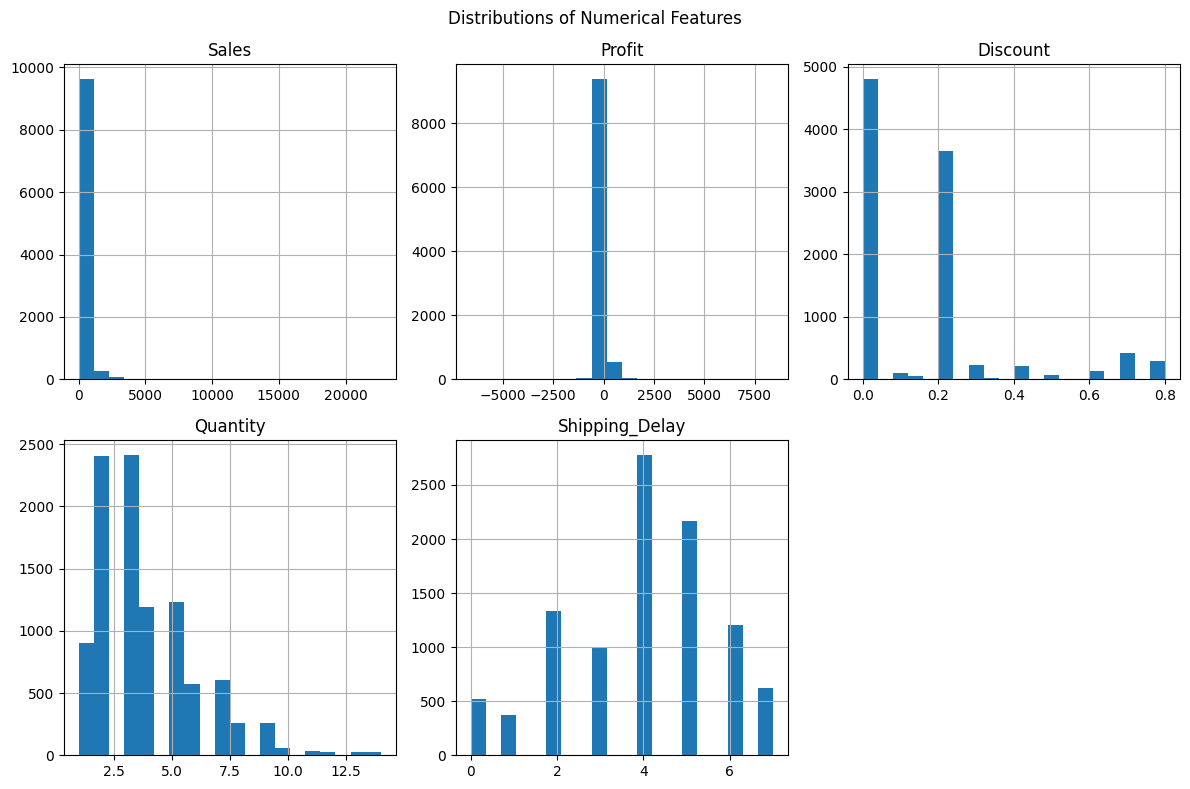

In [14]:
# Plot distribution of numerical features
num_cols = ['Sales', 'Profit', 'Discount', 'Quantity', 'Shipping_Delay']
df[num_cols].hist(bins=20, figsize=(12, 8), layout=(2, 3))
plt.suptitle('Distributions of Numerical Features')
plt.tight_layout()
plt.show()

## 📉 Relationship Between Discount and Sales/Profit

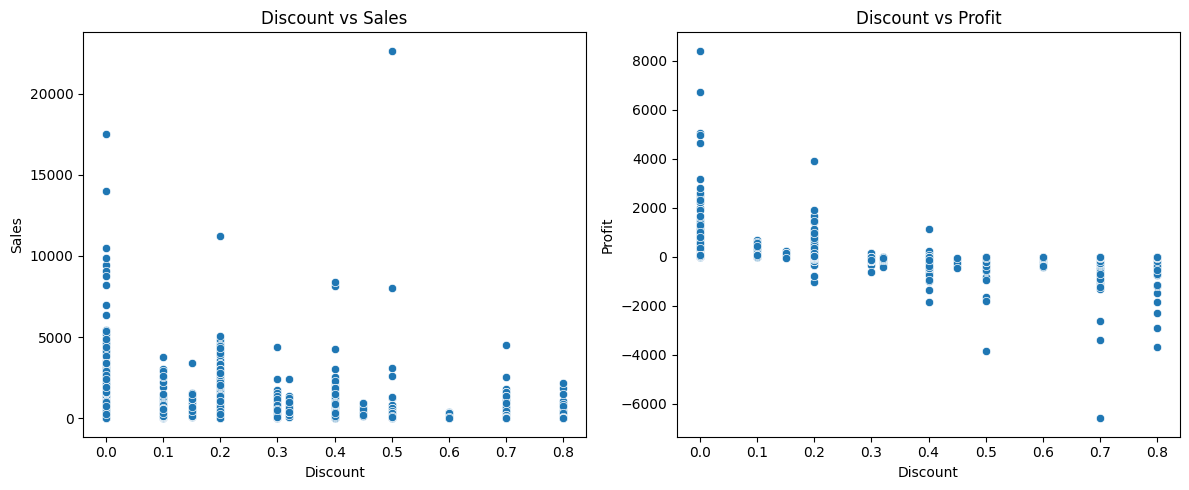

In [4]:
# Scatter plots of discount vs. sales and profit
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.scatterplot(x='Discount', y='Sales', data=df, ax=axes[0])
axes[0].set_title('Discount vs Sales')
sns.scatterplot(x='Discount', y='Profit', data=df, ax=axes[1])
axes[1].set_title('Discount vs Profit')
plt.tight_layout()
plt.show()

## 📦 Sub-Category Sales and Profit Comparison

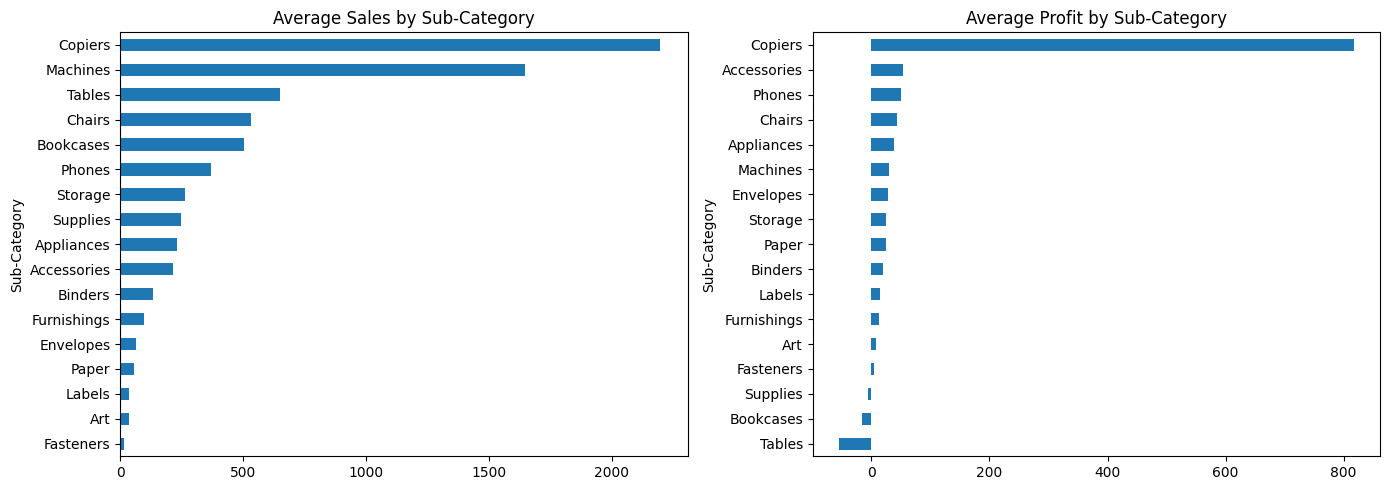

In [5]:
# Bar plots for average sales and profit by sub-category
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
df.groupby('Sub-Category')['Sales'].mean().sort_values().plot(kind='barh', ax=axes[0])
axes[0].set_title('Average Sales by Sub-Category')
df.groupby('Sub-Category')['Profit'].mean().sort_values().plot(kind='barh', ax=axes[1])
axes[1].set_title('Average Profit by Sub-Category')
plt.tight_layout()
plt.show()

## 🔗 Correlation Heatmap of Numerical Features

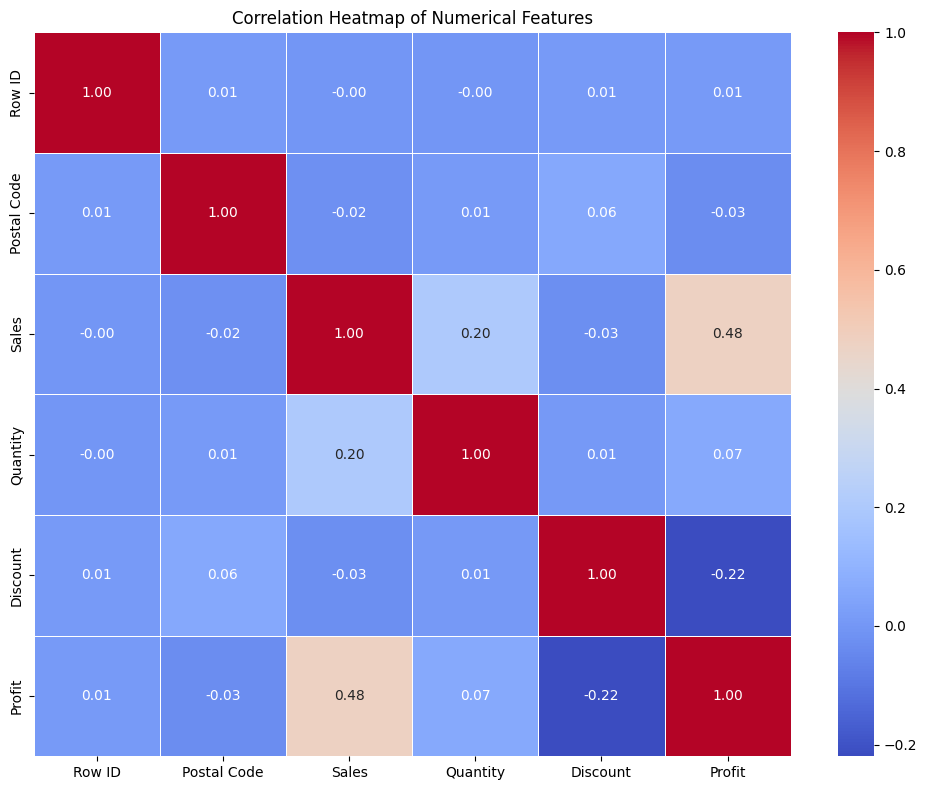

In [6]:
# Compute and plot the correlation heatmap
plt.figure(figsize=(10, 8))
corr_matrix = df.select_dtypes(include='number').corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.tight_layout()
plt.show()

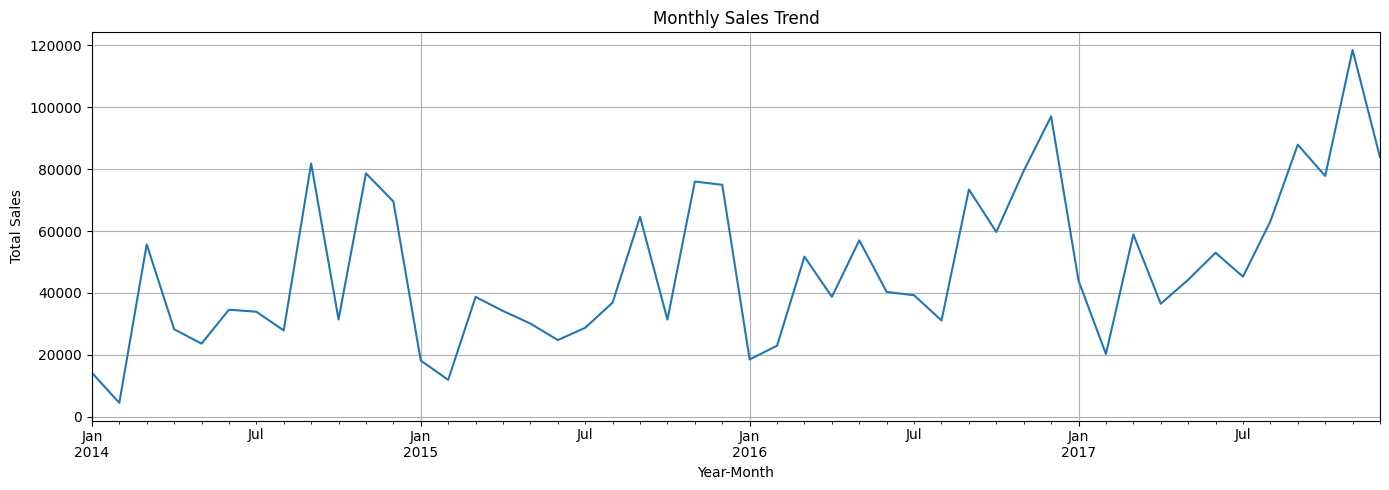

In [7]:
# Seasonal Trends: Sales over Time
# Convert Order Date to datetime if not already
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Extract year-month for trend plotting
df['Order_YearMonth'] = df['Order Date'].dt.to_period('M')

# Plot sales trend over time
monthly_sales = df.groupby('Order_YearMonth')['Sales'].sum()

plt.figure(figsize=(14, 5))
monthly_sales.plot()
plt.title('Monthly Sales Trend')
plt.xlabel('Year-Month')
plt.ylabel('Total Sales')
plt.grid(True)
plt.tight_layout()
plt.show()



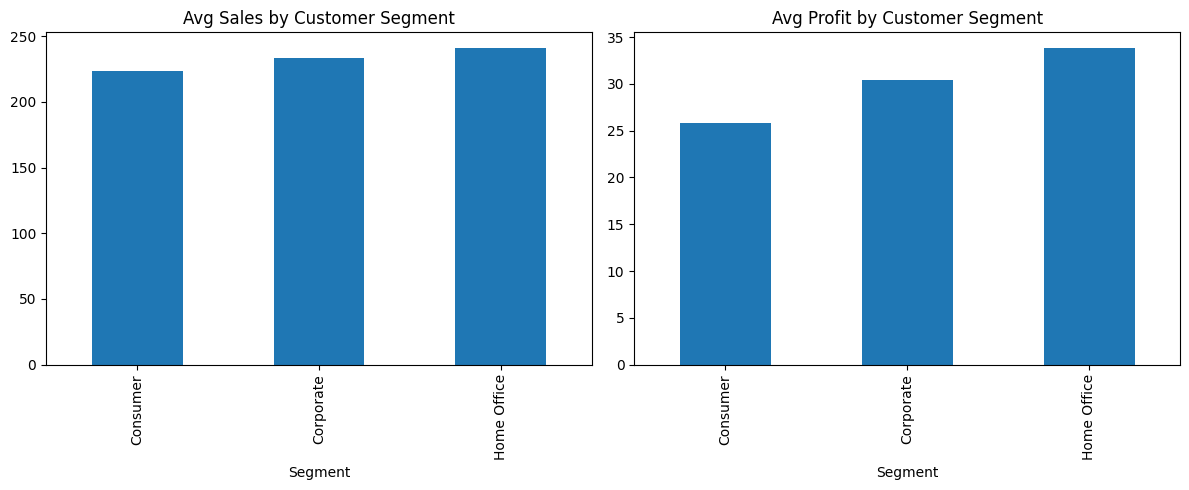

In [8]:
# Sales and Profit by Customer Segmant
# Bar plots for average sales and profit by segment
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

df.groupby('Segment')['Sales'].mean().sort_values().plot(kind='bar', ax=axes[0])
axes[0].set_title('Avg Sales by Customer Segment')

df.groupby('Segment')['Profit'].mean().sort_values().plot(kind='bar', ax=axes[1])
axes[1].set_title('Avg Profit by Customer Segment')

plt.tight_layout()
plt.show()


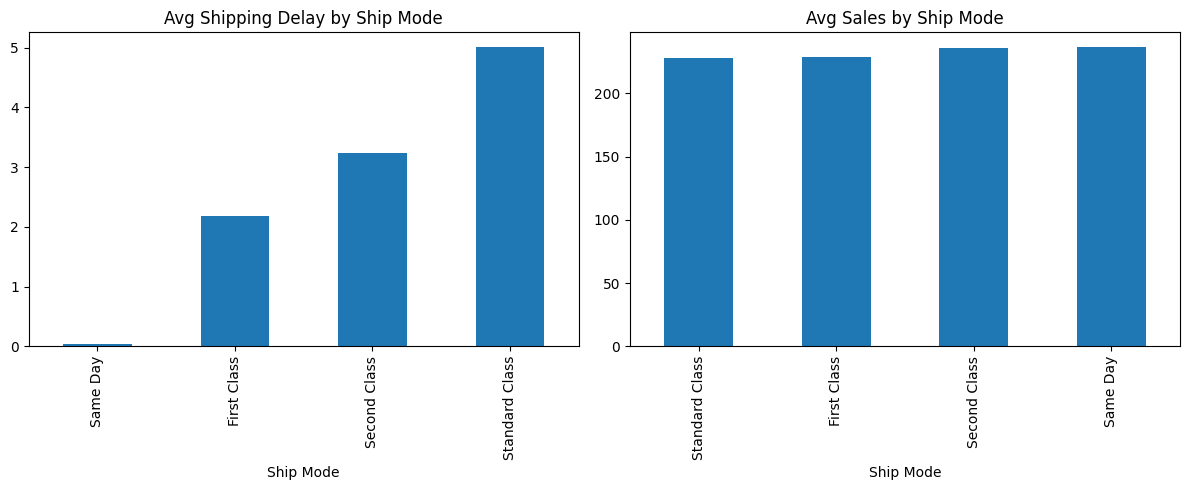

In [15]:
# Bar plots for average shipping delay and sales by ship mode
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

df.groupby('Ship Mode')['Shipping_Delay'].mean().sort_values().plot(kind='bar', ax=axes[0])
axes[0].set_title('Avg Shipping Delay by Ship Mode')

df.groupby('Ship Mode')['Sales'].mean().sort_values().plot(kind='bar', ax=axes[1])
axes[1].set_title('Avg Sales by Ship Mode')

plt.tight_layout()
plt.show()